In [34]:
#Quantum Dice
#Amitava Chakraborty - 19th Dec 2019
#Issue : After around 4000 rolls, the sequence repeats. 
#So if you roll the same dice over 4000 times, the pattern repeats and thus is no longer random. 
#The circuit uses only 5 qubits, the app doesn't support a die larger than 32 sides. 

from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-04-06 12:50:05,121: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [35]:
import numpy as np
import math
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')

Classical computers can, at best, generate pseudo random numbers. 
Quantum computers, using uniquely quantum properties, can generate truly random numbers. 

This example uses random numbers generated from IBM Q's quantum systems 
to provide a random sequence for different types of dice.

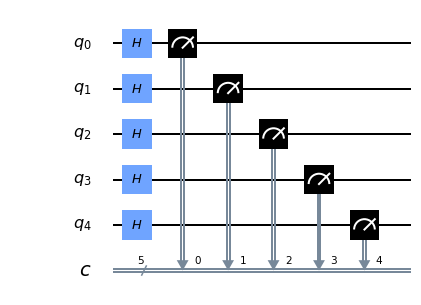

In [36]:
#Circuit to obtain random numbers
#The circuit uses 5 qubits - to each a hadamard gate is added.
#The H gate sets that qubit into a superposition state of 0 and 1. 
#A measurement gate is then applied to each qubit - there is a 50% chance of getting a 0, and a 50% of getting a 1. 
#When all 5 qubits are measured, we will get a result - any 5 bit combination of 0s and 1s 
#Because all qubits had an equal chance of being 0 or 1, 
#the output had an equal chance of being anything between 00000 and 11111.


qc = QuantumCircuit(5, 5)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
qc.draw('mpl')

In [37]:
#We use Python to convert those binary numbers to decimals from 0 to 31 
#Hence this circuit is a random number generator for values between 0 and 31. 

#IBMQs are not yet perfect - 
#so the probalibility distribution to generate true random numbers is close to a uniform distribution, but not fully uniform
#Imperfections are due to sources of noise--such as errors in measurement--
#and some of it is due to the number of times we rolled the dice. 
#The lower the noise and the more rolls we make, the closer the observed distribution will be to uniform.

#We ran the above circuit several thousand times and stored the results.
#The sequence is truly random unless we do more than 4000 dice rolls. 

shots = 4096
job = execute(qc, backend, shots=shots, memory=True)

In [38]:
#we want to see results independently, instead of as a probability
result = job.result()
memory = result.get_memory()

# need an array to drop all the results into
outputArray = []

#convert results to decimal and drop into array
for i in range(0, shots):
  converted = int(memory[i], 2)
  outputArray.append(converted)

print(outputArray)
#That's it for getting a truly random sequence from our quantum system. 

[14, 30, 16, 20, 19, 16, 24, 0, 3, 12, 7, 16, 2, 25, 20, 24, 18, 15, 28, 17, 1, 12, 27, 8, 28, 8, 31, 23, 0, 18, 24, 20, 8, 20, 10, 15, 7, 8, 23, 31, 0, 25, 30, 28, 12, 14, 2, 12, 25, 5, 1, 13, 11, 5, 30, 5, 5, 9, 22, 26, 19, 10, 11, 14, 10, 22, 21, 13, 4, 24, 15, 24, 21, 30, 11, 7, 10, 19, 15, 5, 24, 31, 13, 21, 15, 31, 29, 3, 16, 13, 15, 23, 9, 12, 26, 8, 13, 3, 22, 1, 2, 11, 22, 3, 20, 9, 27, 11, 27, 29, 13, 19, 4, 0, 23, 20, 16, 22, 29, 27, 5, 19, 2, 28, 14, 30, 11, 17, 14, 23, 17, 5, 11, 0, 0, 1, 12, 17, 28, 0, 12, 15, 31, 10, 1, 26, 12, 20, 24, 17, 19, 7, 18, 14, 6, 18, 23, 16, 11, 27, 5, 4, 17, 8, 6, 20, 0, 25, 28, 22, 2, 10, 10, 23, 24, 17, 1, 12, 5, 15, 0, 2, 4, 8, 5, 0, 20, 15, 0, 30, 2, 29, 27, 30, 0, 19, 11, 8, 8, 29, 23, 0, 3, 11, 20, 19, 6, 0, 21, 4, 26, 6, 13, 26, 31, 11, 19, 16, 22, 3, 7, 26, 28, 3, 2, 9, 24, 4, 21, 5, 15, 27, 17, 7, 3, 22, 18, 11, 13, 11, 10, 27, 3, 24, 31, 13, 25, 1, 18, 24, 19, 11, 4, 23, 14, 3, 25, 5, 25, 27, 7, 2, 23, 27, 14, 4, 11, 11, 30, 12, 9, 

In [41]:
#Next, let's look at building a simple web app around the results.
import random
index = math.floor(random.random() * len(outputArray))

#When someone rolls a dice, we need to normalize our or array of random numbers. 
#Technically speaking, its the sequence that is random, not the numbers. 
#Once normalized, we'll multiply the value by the size of the dice and round up 
#(most dice don't include decimal places. Ours won't either). 
#We also add a "plus 1" because we don't want our dice to roll a zero.

#maxDiceRoll is 32, because 5 bits has a max of 32.
maxDiceRoll=32
#How many faces the dice has
diceSize=6
normalizedRoll = (outputArray[index] + 1)/maxDiceRoll
print(outputArray[index],normalizedRoll)
result = math.ceil(normalizedRoll * diceSize);
print(result)

11 0.375
3
